## Predicting House Prices

> #### Task
- The task is to predict house prices based on various features like the size of the house, number of bedrooms, and location, using a machine learning algorithm


> #### Objectives

 - Understand how machine learning algorithms can be applied to predict continuous values (regression problem)
 - Implement a Linear Regression model to predict house prices
- Evaluate the model's performance using evaluation metrics such as Mean Absolute Error, Mean Squared Error, and R squared (R²)

In [83]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [36]:
# loading the dataset
df = pd.read_csv("../Data/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
print(f'we have {df.shape[0]} number of records and {df.shape[1]} number of features')

we have 1460 number of records and 81 number of features


In [40]:
#checking the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [42]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

#### Data Preprocessing

In [47]:
# Drop columns that are not useful for prediction
columns_to_drop = ['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature']
df = df.drop (columns=columns_to_drop , axis=1)

In [50]:
# Convert categorical variables into dummy variables
df = pd.get_dummies (df, drop_first =True)

In [54]:
# Fill missing numerical values with the median of the respective columns
df = df.fillna(df.median())

In [58]:
# Split the data into features (X) and target variable (y)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

#### Split the Dataset into Training and Testing Sets

In [64]:
# Use an 80 - 20 train test split
X_train, X_test , y_train , y_test = train_test_split (X, y, test_size =0.2, random_state =42)

#### Train the Linear Regression Model

In [68]:
# Initialize the Linear Regression model
model = LinearRegression()

In [70]:
# Fit the model to the training data
model.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Making predictions with the linear Regression model

In [73]:
# Predict on the test set
y_pred = model.predict(X_test)

#### Evaluating the linear Regression model

In [104]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test , y_pred)
mse= mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)

In [106]:
# Print the evaluation results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R squared (R²): {r2}')

Mean Absolute Error (MAE): 20584.179560457287
Mean Squared Error (MSE): 2729610891.25086
R squared (R²): 0.6441336629603569


#### VISUALIZE THE RESULTS

<function matplotlib.pyplot.show(close=None, block=None)>

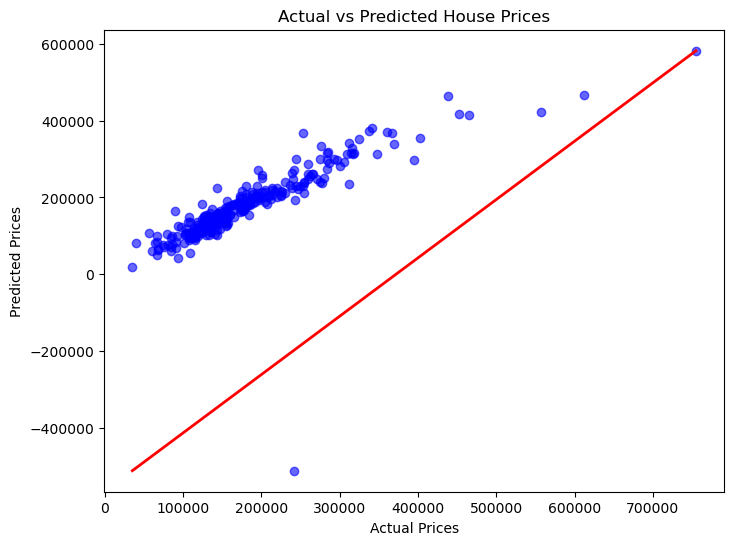

In [81]:
# Plot actual vs predicted house prices
plt.figure(figsize =(8, 6))
plt.scatter(y_test , y_pred , alpha=0.6, color ='blue')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color ='red', linewidth=2)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show

#### Using another regression model: Random Forest Regressor

##### Train the Random Forest Regression Model

In [90]:
#Initialize the Random Forest Regressor
model =RandomForestRegressor(random_state =42)

In [110]:
# Fit the model to the training data
model.fit(X_train , y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [111]:
#### Making predictions with the Random Forest Regressor model
# Predict on the test set
y_pred = model.predict(X_test)

In [112]:
#### Evaluating the Random Forest Regressor model
mae = mean_absolute_error(y_test , y_pred)
mse= mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)

# Print the evaluation results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R squared (R²): {r2}')

Mean Absolute Error (MAE): 17429.145479452054
Mean Squared Error (MSE): 816187827.3081173
R squared (R²): 0.8935915102876139


In [116]:
#Then export the random forest model